### Ordinary Least Square

#### References:
- [OLS Algorithm](https://en.wikipedia.org/wiki/Ordinary_least_squares)
- [Scikit-learn OLS](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression)

<a href="https://colab.research.google.com/github/paulaceccon/ml-from-scratch/blob/main/notebooks/ols.ipynb" target="_parent" style="float: left;"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import math

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn import datasets
from sklearn.preprocessing import StandardScaler

%matplotlib inline

In [2]:
X, y = datasets.load_diabetes(return_X_y=True)

# We only take the first feature (for visualization purposes).
X = X[:, np.newaxis, 2]

# Split the data into training/testing sets
X_train = X[:-20]
X_test = X[-20:]
y_train = y[:-20]
y_test = y[-20:]

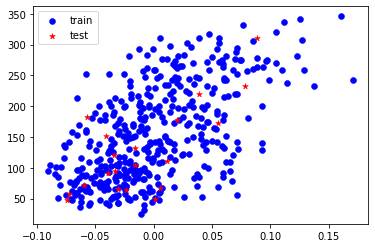

In [3]:
# Input data
sns.scatterplot(x=X_train[:, 0], y=y_train, label="train", edgecolor=None, color="blue")
# To predict
sns.scatterplot(
    x=X_test[:, 0],
    y=y_test,
    label="test",
    edgecolor=None,
    marker="*",
    color="red",
);

#### Model:

$ \hat{y}_{i} = \sum_{i}^{D} w_i \cdot x_i $, where $x_i = 1$

- In matrix form:

$ \hat{\mathbf{y}} = X \mathbf{w} $ 

#### Residual Sum of Squares (cost function)

$ \text{RSS}(\mathbf{w}) = \sum_{i}^{D} (y_i - \hat{y}_i)^2 = \sum_{i}^{D} (y_i - w_i \cdot x_i)^2$ 

- In matrix form:

$ \text{RSS}(\mathbf{w}) = (\mathbf{y} - X \mathbf{w})^T (\mathbf{y} - X \cdot \mathbf{w}) $

#### Gradient of the cost function

$ \nabla \text{RSS}(\mathbf{w}) = \nabla[(\mathbf{y} - X \mathbf{w})^T (\mathbf{y} - X \mathbf{w})] = -2X^T (\mathbf{y} - X \mathbf{w})$

In [4]:
class LinearRegression:
    """
    Ordinary least squares Linear Regression.

    Args:
        learning_rate: learning rate to be used.
        tolerance: threshold to be used to check for convergence.
    """

    def __init__(self, learning_rate: float = 1e-5, tolerance: float = 1e4):
        self._learning_rate: float = learning_rate
        self._tolerance: float = tolerance
        self._fitted: bool = False

    def fit(self, X: np.ndarray, y: np.ndarray) -> None:
        """Fit linear model."""
        self._X: np.ndarray = X
        self._y: np.ndarray = y[:, np.newaxis]
        self._m, self._n = self._X.shape  # rows, features
        self._weights: np.ndarray = np.zeros((self._n, 1))

        self._train()

    def predict(self, X: np.ndarray, add_bias: bool = True) -> np.ndarray:
        """Predict using the linear model."""
        assert self._fitted, "Model not fitted."
        if add_bias:
            X = np.c_[np.ones((X.shape[0], 1)), X]

        predictions = np.dot(X, self._weights)
        return predictions

    def _train(self) -> None:
        """
        Generate the clusters from the traning data.

        Algorithm:
            1. Initiliaze weights.
            2. Compute the cost.
            3. Calculate the gradient.
            4. Update weights.
            4. Repeat from 2 until convergence.
        """
        # Add bias term
        self._X = np.c_[np.ones((self._m, 1)), self._X]
        self._weights = np.r_[np.ones((1, 1)), self._weights]

        self._fitted = True

        converged = False
        iterations = 0
        while not converged:
            iterations += 1
            y_hat = self.predict(self._X, add_bias=False)
            residuals = self._residuals(self._y, y_hat)
            gradients = self._gradients(self._X, residuals)
            self._weights -= self._learning_rate * gradients

            gradient_magnitude = np.linalg.norm(gradients)
            self._check_diverging(gradient_magnitude)

            if gradient_magnitude < self._tolerance:
                converged = True

    def _residuals(self, y: np.ndarray, y_hat: np.ndarray) -> np.ndarray:
        """Calculate residuals."""
        residuals = y - y_hat
        return residuals

    def _gradients(self, X: np.ndarray, residuals: np.ndarray) -> np.ndarray:
        """Calculate gradients for gradient descent step."""
        gradients = -2 * np.dot(X.T, residuals)
        return gradients

    def _check_diverging(self, gradient_magnitude: float) -> None:
        """Helper to check for solution diverging."""
        if math.isnan(gradient_magnitude) or math.isinf(gradient_magnitude):
            raise ValueError(
                "Looks like solution is diverging. Check your learning rate!"
            )

In [5]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [6]:
clf = LinearRegression()
clf.fit(X_train, y_train)

In [7]:
y_pred = clf.predict(X_test)

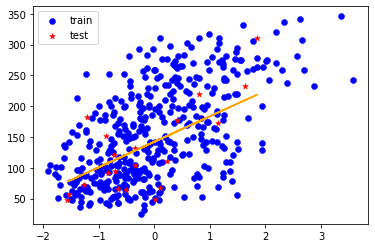

In [9]:
# Input data
sns.scatterplot(x=X_train[:, 0], y=y_train, label="train", edgecolor=None, color="blue")
# To predict
sns.scatterplot(
    x=X_test[:, 0],
    y=y_test,
    label="test",
    edgecolor=None,
    marker="*",
    color="red",
)
plt.plot(X_test, y_pred, color="orange");